In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.084417485 W= 0.297954 b= 0.453566
Epoch: 0100 cost= 0.083556317 W= 0.295078 b= 0.474258
Epoch: 0150 cost= 0.082794756 W= 0.292372 b= 0.493719
Epoch: 0200 cost= 0.082121342 W= 0.289828 b= 0.512022
Epoch: 0250 cost= 0.081525847 W= 0.287435 b= 0.529236
Epoch: 0300 cost= 0.080999285 W= 0.285185 b= 0.545428
Epoch: 0350 cost= 0.080533676 W= 0.283068 b= 0.560655
Epoch: 0400 cost= 0.080121964 W= 0.281077 b= 0.574979
Epoch: 0450 cost= 0.079757899 W= 0.279204 b= 0.58845
Epoch: 0500 cost= 0.079436049 W= 0.277443 b= 0.60112
Epoch: 0550 cost= 0.079151504 W= 0.275786 b= 0.613037
Epoch: 0600 cost= 0.078899950 W= 0.274229 b= 0.624243
Epoch: 0650 cost= 0.078677572 W= 0.272764 b= 0.634782
Epoch: 0700 cost= 0.078480981 W= 0.271386 b= 0.644694
Epoch: 0750 cost= 0.078307189 W= 0.27009 b= 0.654017
Epoch: 0800 cost= 0.078153573 W= 0.268871 b= 0.662786
Epoch: 0850 cost= 0.078017771 W= 0.267725 b= 0.671034
Epoch: 0900 cost= 0.077897720 W= 0.266646 b= 0.678791
Epoch: 0950 cost= 0.077791624 W

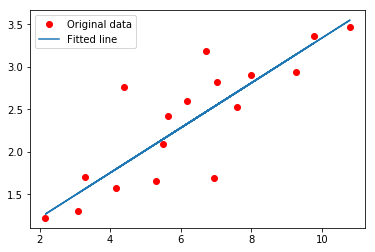

In [10]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [ ]:
# Regression result